On remets en place les mêmes librairies et données que précédement.

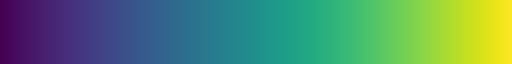

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
#palettes
sns.color_palette("magma", as_cmap=True)
sns.color_palette("cubehelix", as_cmap=True)
sns.color_palette("flare", as_cmap=True)
sns.color_palette("viridis", as_cmap=True)

In [10]:
df_oct = pd.read_csv("matchs_octobre.csv",index_col = 0)
for col in df_oct.columns[:-1]:
    df_oct[col] = df_oct[col].apply(lambda x: eval(x))
df_nov = pd.read_csv("matchs_novembre.csv",index_col = 0)
for col in df_nov.columns[:-1]:
    df_nov[col] = df_nov[col].apply(lambda x: eval(x))
df_mat_fea = pd.read_csv("matchs_features_novembre.csv")

In [3]:
champ_list = ['Nilah',
 'Renata',
 'Belveth',
 'Aatrox',
 'Ahri',
 'Akali',
 'Akshan',
 'Alistar',
 'Amumu',
 'Anivia',
 'Annie',
 'Aphelios',
 'Ashe',
 'AurelionSol',
 'Azir',
 'Bard',
 'Blitzcrank',
 'Brand',
 'Braum',
 'Caitlyn',
 'Camille',
 'Cassiopeia',
 'Chogath',
 'Corki',
 'Darius',
 'Diana',
 'Draven',
 'DrMundo',
 'Ekko',
 'Elise',
 'Evelynn',
 'Ezreal',
 'FiddleSticks',
 'Fiora',
 'Fizz',
 'Galio',
 'Gangplank',
 'Garen',
 'Gnar',
 'Gragas',
 'Graves',
 'Gwen',
 'Hecarim',
 'Heimerdinger',
 'Illaoi',
 'Irelia',
 'Ivern',
 'Janna',
 'JarvanIV',
 'Jax',
 'Jayce',
 'Jhin',
 'Jinx',
 'Kaisa',
 'Kalista',
 'Karma',
 'Karthus',
 'Kassadin',
 'Katarina',
 'Kayle',
 'Kayn',
 'Kennen',
 'Khazix',
 'Kindred',
 'Kled',
 'KogMaw',
 'KSante',
 'Leblanc',
 'LeeSin',
 'Leona',
 'Lillia',
 'Lissandra',
 'Lucian',
 'Lulu',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'MasterYi',
 'MissFortune',
 'MonkeyKing',
 'Mordekaiser',
 'Morgana',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nidalee',
 'Nocturne',
 'Nunu',
 'Olaf',
 'Orianna',
 'Ornn',
 'Pantheon',
 'Poppy',
 'Pyke',
 'Qiyana',
 'Quinn',
 'Rakan',
 'Rammus',
 'RekSai',
 'Rell',
 'Renekton',
 'Rengar',
 'Riven',
 'Rumble',
 'Ryze',
 'Samira',
 'Sejuani',
 'Senna',
 'Seraphine',
 'Sett',
 'Shaco',
 'Shen',
 'Shyvana',
 'Singed',
 'Sion',
 'Sivir',
 'Skarner',
 'Sona',
 'Soraka',
 'Swain',
 'Sylas',
 'Syndra',
 'TahmKench',
 'Taliyah',
 'Talon',
 'Taric',
 'Teemo',
 'Thresh',
 'Tristana',
 'Trundle',
 'Tryndamere',
 'TwistedFate',
 'Twitch',
 'Udyr',
 'Urgot',
 'Varus',
 'Vayne',
 'Veigar',
 'Velkoz',
 'Vex',
 'Vi',
 'Viego',
 'Viktor',
 'Vladimir',
 'Volibear',
 'Warwick',
 'Xayah',
 'Xerath',
 'XinZhao',
 'Yasuo',
 'Yone',
 'Yorick',
 'Yuumi',
 'Zac',
 'Zed',
 'Ziggs',
 'Zilean',
 'Zoe',
 'Zyra',
 'Zeri']

In [4]:
df_mat_fea = pd.read_csv("matchs_features_novembre.csv")

compteur = np.zeros([10,len(champ_list)], dtype = int)
for i in range(10) :
    for j in df_oct[df_oct.columns[i]] :      
        compteur[i][champ_list.index(j[1])] += 1

for i in range(10) :
    for j in df_nov[df_nov.columns[i]] :      
        compteur[i][champ_list.index(j[1])] += 1

champ_game_played = np.zeros(len(compteur[0]), dtype = int)
for i in range(10) :
    champ_game_played += compteur[i]

In [5]:
nb_games_pl = np.zeros(len(champ_game_played))
champ_game_count = champ_game_played.copy()


for j in range(df_nov.shape[0]) :
    for k in range(10) :
        index = champ_list.index(df_nov.iloc[j][k][1])
        if champ_game_played[index] >= 500 and champ_game_played[index] <= 1500 :  
            if df_nov.iloc[j][k][1] == champ_list[index] :
                if df_mat_fea.iloc[j][2*k+1] >= 0 :
                    nb_games_pl[index] += df_mat_fea.iloc[j][2*k+1]
                else :
                    champ_game_count[index] -= 1

In [6]:
df_game_count = pd.DataFrame({"Champion" : champ_list, "Moyenne Parties" : nb_games_pl/champ_game_count, "Popularité" : champ_game_count})
df_game_count.drop(df_game_count[df_game_count['Moyenne Parties'] == 0].index, inplace = True)

df_game_count = df_game_count.sort_values("Popularité")

In [7]:
nb_games_order = np.array(df_game_count["Moyenne Parties"])
game_count_order = np.array(df_game_count["Popularité"])
ordre = [ int(i/8+1) for i in range (len(game_count_order))]

df_test = pd.DataFrame({"Moyenne Parties" : nb_games_order, "Popularité" : game_count_order, "Groupe" : ordre})

<AxesSubplot:xlabel='Groupe', ylabel='Moyenne Parties'>

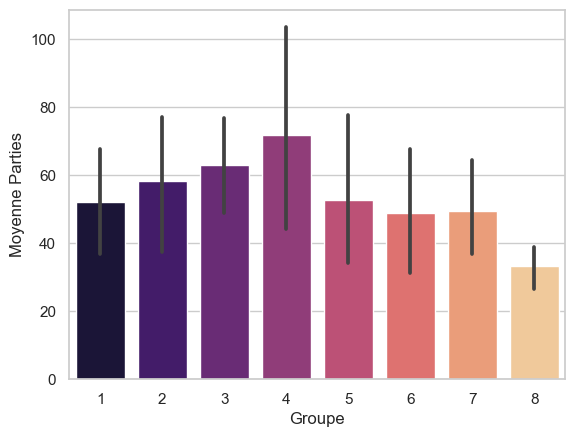

In [8]:
sns.barplot(x = "Groupe", y="Moyenne Parties", palette = "magma", data= df_test)